In [1]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import pandas as pd

In [2]:
def give_me_df(ticker):
    import yfinance as yf # !pip install yfinance
    stock = yf.Ticker(ticker)
    df = stock.history(period='max')
    df[ticker] = df.Close.pct_change()
    return df[[ticker]].iloc[1:]

In [3]:
df1 = give_me_df('SPY') 
df2 = give_me_df('AAPL') 
df3 = give_me_df('FB') 

In [4]:
def join_dfs(*dfs):
    for idx, df_ in enumerate(dfs):
        if idx == 0:
            df = df_
        else:
            df = df.join(df_, how='inner')
    return df

In [5]:
if 1:
    df = join_dfs(df1, df2)
elif 1:
    df = join_dfs(df1, df2, df3)

In [6]:
def train_test_split(df, test_size_ratio=0.3):
    num_data = df.shape[0]
    num_data_train = int(num_data * (1-test_size_ratio)) 
    xy_train = df.iloc[:num_data_train].values
    xy_test = df.iloc[num_data_train:].values
    x_train = xy_train[:,:-1].astype(np.float32)
    y_train = xy_train[:,-1].astype(np.float32).reshape((-1,1))
    x_test = xy_test[:,:-1].astype(np.float32)
    y_test = xy_test[:,-1].astype(np.float32).reshape((-1,1))
    return x_train, y_train, x_test, y_test

In [7]:
x_train, y_train, x_test, y_test = train_test_split(df) 
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype)

(5007, 1) (5007, 1) (2146, 1) (2146, 1)
float32 float32 float32 float32


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

In [9]:
print(model.intercept_)
print(model.coef_)

[0.00079767]
[[1.0729415]]


$$
R^2 = \frac{\text{Variance Explained by Model}}{\text{Total Variance}}=1-\frac{SSE}{SST}
$$
where
$$\begin{array}{lll}
SST&=&\sum(y_i-\bar{y})^2\\
SSE&=&\sum(y_i-(\hat{\alpha}+\hat{\beta}x_i))^2\\
\end{array}$$

[wiki](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [10]:
print(model.score(x_train, y_train)) # R^2
print(model.score(x_test, y_test)) # R^2

0.18328551025784046
0.4522866414821348


$$
\begin{array}{lll}
\mbox{MAE}&&\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|\\
\mbox{MSE}&&\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2\\
\mbox{RMSE}&&\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
\end{array}
$$

In [11]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_test_pred))
print(metrics.mean_squared_error(y_test, y_test_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.00917762
0.0001773454
0.013317109


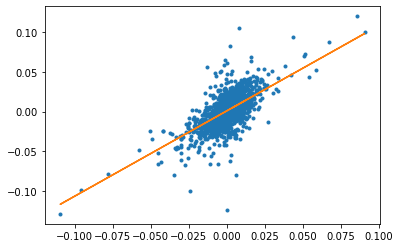

In [12]:
if 1:
    plt.plot(x_test.reshape((-1,)), y_test.reshape((-1,)), '.');
    plt.plot(x_test.reshape((-1,)), y_test_pred.reshape((-1,)));
elif 1:
    plt.plot(y_test.reshape((-1,)), y_test_pred.reshape((-1,)), '.');